In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import klib
import sklearn

In [51]:
%cd "C:\Users\kinne\Desktop\Technocolabs Internship\Data"

C:\Users\kinne\Desktop\Technocolabs Internship\Data


In [52]:
data = pd.read_csv('data.csv')

In [53]:
data

,Unnamed: 0,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,0,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
1,1,2013,1,8,1415.0,1418,-3.0,1531.0,1552,-21.0,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
2,2,2013,1,8,1600.0,1444,76.0,1934.0,1802,92.0,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
3,3,2013,1,8,1448.0,1446,2.0,1541.0,1555,-14.0,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
4,4,2013,1,8,1542.0,1459,43.0,1707.0,1623,44.0,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272793,272793,2013,3,30,2017.0,2030,-13.0,2138.0,2204,-26.0,...,55.94,17.96,22.32,300.0,9.20624,10.594357,0.0,1017.9,10.0,2013-03-30T20:00:00Z
272794,272794,2013,7,11,546.0,545,1.0,806.0,813,-7.0,...,82.94,71.06,67.44,230.0,10.35702,11.918651,0.0,1009.2,10.0,2013-07-11T04:00:00Z
272795,272795,2013,9,8,509.0,516,-7.0,749.0,756,-7.0,...,69.08,53.96,58.56,250.0,9.20624,10.594357,0.0,1012.2,10.0,2013-09-08T04:00:00Z
272796,272796,2013,11,21,526.0,515,11.0,814.0,808,6.0,...,33.08,19.04,55.89,350.0,4.60312,5.297178,0.0,1035.5,10.0,2013-11-21T05:00:00Z


In [54]:
data.drop(['year_x','day','tailnum','origin','dest','time_hour_x','model','year_y','time_hour_y'],axis=1,inplace=True)

In [55]:
data['scheduled_time'] = data['sched_arr_time'] - data['sched_dep_time']
data['actual_time'] = data['arr_time'] - data['dep_time']

In [56]:
data['flight_delay'] = data['actual_time'] - data['scheduled_time']

In [57]:
data.drop(['scheduled_time','actual_time'],axis=1,inplace=True)

In [58]:
def chk(x):
    if x>0:
        return(1)
    else:
        return(0)

In [59]:
data["DELAYED"]=data["flight_delay"].apply(chk)

<AxesSubplot:>

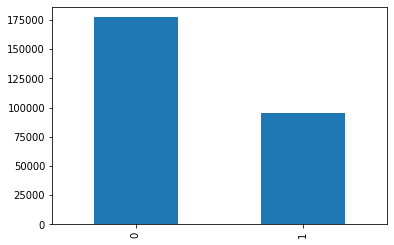

In [60]:
data['DELAYED'].value_counts().plot(kind='bar')

In [61]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['type']= label_encoder.fit_transform(data['type'])
data['engine']= label_encoder.fit_transform(data['engine'])
data['manufacturer']= label_encoder.fit_transform(data['manufacturer'])
data['carrier']= label_encoder.fit_transform(data['carrier'])

In [62]:
X = data.drop(['DELAYED'],axis=1)
y = data['DELAYED']

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)